<a href="https://colab.research.google.com/github/farfaness/dimension_reduction_and_clutering/blob/master/hierarchical_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the needed librairies

In [0]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing

# Import the data from my drive

In [0]:
# To download the dataset from my google drive : mout my drive
from google.colab import drive
drive.mount('/content/drive')

In [5]:
# Read the file
path = '/content/drive/My Drive/reduction_dimension_et_clustering/bag_of_words.csv'
data = pd.read_csv(path, index_col = 0)
data.head()

,aaaa,abandonner,abattement,abbr,abc,abondement,abonnement,abonner,abonnés,aborder,aborderons,abordé,abordées,abordés,about,aboutir,aboutit,above,abrégé,abs,abscisse,abscisses,absence,absences,absent,absolu,absolue,absolument,absolute,abstract,abstraction,abstracttype,abstrait,abstraite,abstraites,abus,abuser,accent,accents,accept,...,évaluer,évaluez,évalué,évaluée,évaluées,évalués,éventuel,éventuelle,éventuellement,éventuelles,éventuels,évidemment,évidence,évident,évidente,évitant,évite,éviter,évitera,évitez,évolue,évoluent,évoluer,évolutif,évolutifs,évolution,évolutions,évolué,évoque,évoquer,évoqué,évoquées,évoqués,évènement,évènements,événement,événements,êtres,œil,œuvre
Concevez des architectures Big Data,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.002343,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000469,0.000000,0.0,0.0,0.0,0.0,0.0,0.000469,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000469,0.0000,0.0,0.001406,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000469,0.0,0.0000,0.0,0.0,0.000469,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000469,0.000000,0.000000,0.000000
Apprenez à coder avec JavaScript,0.000000,0.0,0.0,0.0,0.000499,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0001,0.0,0.000200,0.0,0.000000,0.0,0.000200,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000100,0.0,...,0.000000,0.0,0.0,0.0002,0.0,0.0,0.0,0.0,0.000200,0.0003,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000599,0.000000,0.000000,0.000100,0.0,0.0001,0.0,0.0,0.000100,0.0001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0001,0.0,0.000000,0.000000,0.000000,0.000000
Concevez votre site web avec PHP et MySQL,0.000524,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000058,0.000029,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.0,0.000175,0.0,0.000029,0.0,0.0,0.000204,0.000058,0.000349,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000058,0.000116,0.0,...,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000087,0.0000,0.0,0.000000,0.0,0.000087,0.0,0.000029,0.000145,0.000786,0.000029,0.000029,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.0000,0.000029,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000087,0.000000
Réussir sa campagne d'e-mailing avec MailChimp,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.020408,0.020408,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000
Utilisez des modèles supervisés non linéaires,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0,0.000325,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000976,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000325,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.000325,0.0,0.000000,0.0,0.000325,0.000000,0.000651,0.000000,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.000325,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000325,0.000000,0.000651


In [6]:
path = '/content/drive/My Drive/reduction_dimension_et_clustering/courses_info.csv'
courses_info = pd.read_csv(path, index_col = 0)
courses_info.head()

,charge-e-de-gestion-des-ressources-humaines,manager-rh,gestionnaire-de-paie,data-architect,developpeur-se-dapplication-python,developpeur-web-junior,community-manager,responsable-marketing-operationnel,developpeur-se-d-application-php-symfony,data-scientist,expert-e-en-strategie-marketing-et-communication,data-analyst,theme
title,,,,,,,,,,,,,
Apprenez à gérer les conflits,True,True,True,False,False,False,False,False,False,False,False,False,RH
Réalisez des calculs distribués sur des données massives,False,False,False,True,False,False,False,False,False,False,False,False,data
Managez une équipe au quotidien,False,True,False,False,False,False,False,False,False,False,False,False,RH
Gérez votre code avec Git et GitHub,False,False,False,False,True,True,False,False,False,False,False,False,dev
Lancez une campagne de publicité avec Google AdWords,False,False,False,False,False,False,True,True,False,False,False,False,marketing


# Definition of a function to plot a dendogram

source : https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5345241-tp-partitionnez-vos-donnees

In [0]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()

# Hierarchical classification

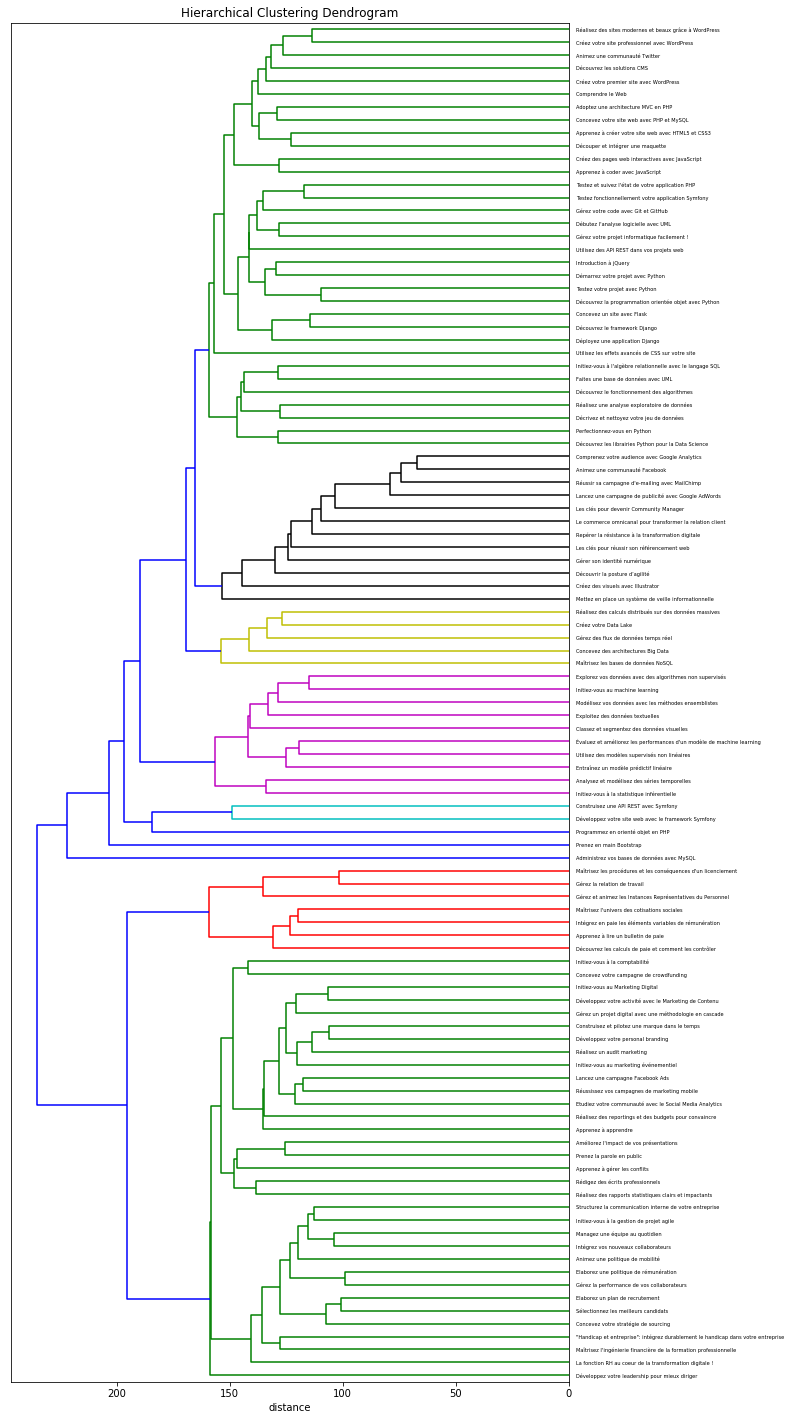

In [10]:
# Theme du ou des parcours auxquels appartient le cours (data, developpement, marketing, etc.)
theme = [courses_info.loc[course_id, "theme"] for course_id in data.index]

# préparation des données pour le clustering
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)

In [11]:
# Coupage du dendrogramme en 12 clusters
clusters = fcluster(Z, 12, criterion='maxclust')
#clusters = fcluster(Z, 159, criterion='distance') # ligne équivalente à la précédente

# Comparaison des clusters trouvés avec les classification des cours en différents thèmes
courses = pd.DataFrame({"theme": theme, "cluster": clusters, "title": names})
print(courses)
print(courses.pivot_table(index="theme", columns="cluster", aggfunc=len, fill_value=0))

              theme  cluster                                              title
0              data        7                Concevez des architectures Big Data
1               dev       10                   Apprenez à coder avec JavaScript
2               dev       10          Concevez votre site web avec PHP et MySQL
3         marketing        8     Réussir sa campagne d'e-mailing avec MailChimp
4              data        6      Utilisez des modèles supervisés non linéaires
5    RH & marketing        8                     Animez une communauté Facebook
6              data        6         Classez et segmentez des données visuelles
7               dev       10       Gérez votre projet informatique facilement !
8              data        7                              Créez votre Data Lake
9               dev        9        Découvrez le fonctionnement des algorithmes
10             data        6                   Initiez-vous au machine learning
11   multi-parcours        1            

# Hierarchical classification on another dataset :  the cat!

In [13]:
# Read the file
path = '/content/drive/My Drive/reduction_dimension_et_clustering/mystery.csv'
data = pd.read_csv(path)
data.head()

,x,y,z
0,-7.988979,15.633928,-5.726221
1,0.108386,-3.456144,22.272791
2,1.565447,10.915797,29.040207
3,0.765086,35.831929,20.892023
4,-8.880745,20.989331,8.337199


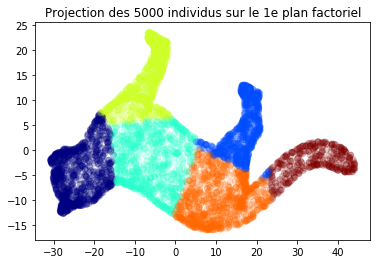

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition

# Nombre de clusters souhaités
n_clust = 6

# préparation des données pour le clustering
X = data.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
# X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=3).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

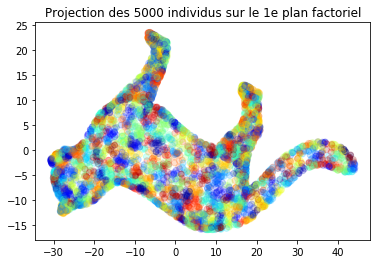

In [18]:
#Nombre de clusters souhaités
n_clust = 500

# préparation des données pour le clustering
X = data.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
# X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=3).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

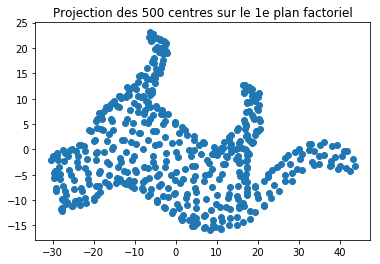

In [19]:
# Affichage des positions des centres de classes
plt.figure()
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.show()

Le même principe peut être utilisé en traitement d'image pour la quantification des couleurs : http://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html